<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주성분 분석 : PCA
  - 고차원의 데이터를 저차원으로 축소하면서 데이터의 주요 특징을 최대한 보존처리 하는 기법
  

In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [199]:
data = np.load('/content/drive/MyDrive/data/fruits_300.npy')
data.shape

(300, 100, 100)

In [200]:
from sklearn.decomposition import PCA
# 3차원 데이터를 2차원으로 변경
data_2dim = data.reshape(300, -1)
data_2dim.shape


(300, 10000)

In [201]:
# 10000개의 차수를 50차수로 변경
pca = PCA(n_components=100)
data_pca = pca.fit_transform(data_2dim)
data_pca.shape , pca.components_.shape

((300, 100), (100, 10000))

In [202]:
pca.components_ ## 주성분을 나타내는 행렬 , 각 행은 주성분을 의미한다.

array([[ 9.24490195e-06,  5.10601298e-06,  8.91640398e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.69701614e-05, -1.13551048e-05, -1.82152562e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.65220461e-05, -2.08401738e-05, -2.89870119e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-7.18135915e-05,  8.30989403e-05,  5.84771262e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.19374616e-05, -1.55193751e-04, -1.17274460e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.58482456e-04, -1.81013130e-04, -2.68219870e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

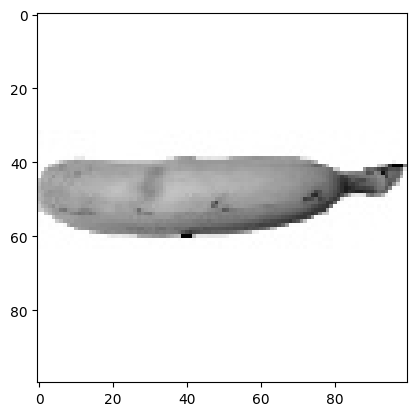

In [203]:
# 2차원 데이터 원본 10000차수
# 2차원데이터를 주성분 분석으로 50차수로 조정 했을때 원본과 조정된 미지의 차이를 시각화

plt.imshow(data_2dim[200].reshape(100,100), cmap='gray_r')
plt.show()

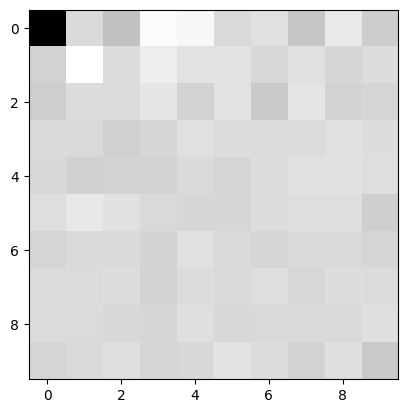

In [204]:
plt.imshow(data_pca[200].reshape(10,10), cmap='gray_r')
plt.show()

In [205]:
data_pca.shape

(300, 100)

In [206]:
target = [0]*100 + [1]*100 + [2]*100

모델을 이용해서 예측하고 평가하는 작업대신에
  - 교차검증을 이용해서 성능평가를 미리 해 볼 수 있음

In [207]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
score = cross_validate(logistic, data_pca, target, cv=5)
score['test_score'].mean(), score['fit_time'].mean()

(1.0, 0.02584948539733887)

In [208]:
score = pd.DataFrame(score)
score

,fit_time,score_time,test_score
0,0.024778,0.001015,1.0
1,0.031540,0.000976,1.0
2,0.017047,0.000900,1.0
3,0.020630,0.000894,1.0
4,0.035252,0.000944,1.0


In [209]:
from sklearn.model_selection import cross_validate # Import the correct function
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_2dim)
print(data_pca.shape, pca.components_.shape)

logistic = LogisticRegression(max_iter = 10000)
results = cross_validate(logistic, data_pca, target, cv=5, return_train_score=False)

# 평균 테스트 점수와 피팅 시간 계산
results['test_score'].mean(), results['fit_time'].mean()

(300, 2) (2, 10000)


(0.9966666666666667, 0.039705419540405275)

In [210]:
# 주성분 분석으로 차원 축소한 데이터를 이용해서 군집을 분류해 봅시다.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [211]:
kmeans.labels_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [212]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 99,  91, 110]))

In [213]:
data_pca

array([[-2778.41779459, -1571.87380917],
       [-3078.27365136, -2739.27041756],
       [-2620.61072939, -1486.8705539 ],
       [-3113.71771062, -2530.02282797],
       [-2520.64705144, -2330.6479098 ],
       [-1556.73860341,   123.05164769],
       [-2711.38755162, -1857.35297433],
       [-2884.74283654, -1836.15286345],
       [-2310.99240338, -2660.46264488],
       [-1521.26665012, -2445.37437225],
       [-2486.91643797, -1475.5504404 ],
       [-2800.83912843, -2001.07115746],
       [-2810.56248913, -2034.36323447],
       [-2209.09841637, -2303.76591054],
       [-2917.38810303, -2438.42531089],
       [-2198.1718942 ,  -636.80185964],
       [-2317.61818126, -2704.80151216],
       [-3289.84664277, -2436.39343376],
       [-2641.95018377,   503.74906955],
       [-3563.8760831 , -1290.01167525],
       [-3708.64597097, -1575.33617738],
       [-2423.96625858, -2080.63342692],
       [-3169.13983546, -2238.74224062],
       [-3059.33441459, -2250.1489978 ],
       [-2745.82

In [214]:
data_pca.shape

(300, 2)

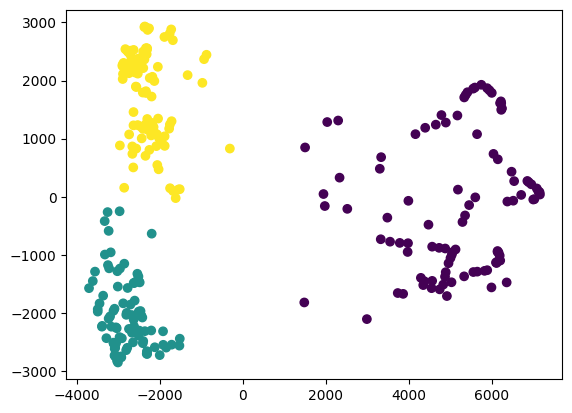

In [215]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=kmeans.labels_)
plt.show()

데이터를 임의로 생성해서 PCA 적용해 보기

In [216]:
np.random.seed(42)
# 데이터 생성
mean = [2,3]
cov = [[3,1], [1,1]] # 공분산 행렬
data = np.random.multivariate_normal(mean, cov, 100)
data.shape

(100, 2)

In [217]:
data

array([[ 1.19255258,  2.55100243],
       [ 0.44824139,  3.61895978],
       [ 2.46830194,  3.00001161],
       [-0.92066133,  2.42598621],
       [ 2.64253075,  3.71561641],
       [ 2.92751257,  2.99836513],
       [ 2.14733137,  1.4760134 ],
       [ 5.10930913,  3.82210377],
       [ 3.63696996,  3.93838617],
       [ 3.96374823,  2.64342046],
       [-0.4358906 ,  1.80398186],
       [ 2.30202123,  1.94480124],
       [ 2.89683097,  3.46337083],
       [ 3.85482954,  4.07953398],
       [ 3.1107895 ,  3.21845706],
       [ 2.48465772,  4.73522929],
       [ 2.33283756,  2.26162941],
       [ 0.95340483,  1.55510609],
       [ 2.21742163,  1.4666151 ],
       [ 4.20969609,  4.07837128],
       [ 0.68916609,  2.59900095],
       [ 2.2856152 ,  2.86886322],
       [ 4.7348324 ,  3.5364662 ],
       [ 2.47673564,  4.07321909],
       [ 1.92978939,  1.51036753],
       [ 1.55954205,  2.49854374],
       [ 2.9764223 ,  3.91117659],
       [-0.03279191,  2.92948773],
       [ 3.52320013,

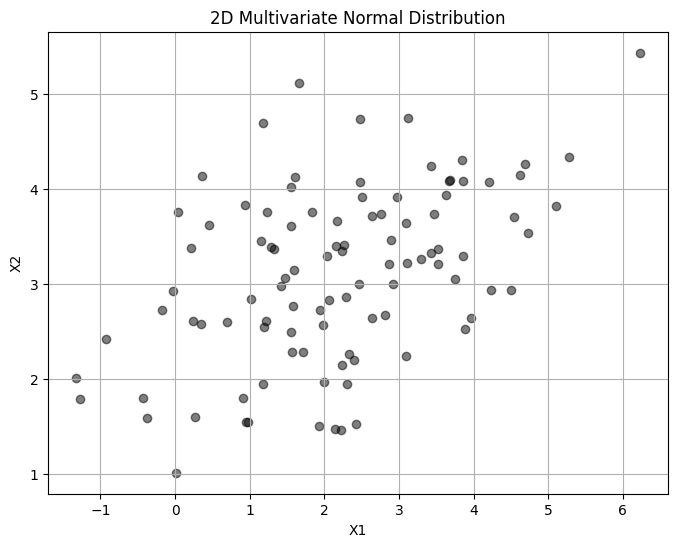

In [218]:
# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='black', marker='o' , alpha= 0.5)
plt.title('2D Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

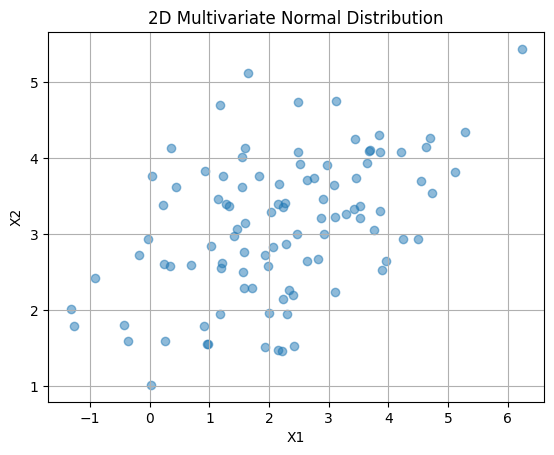

In [219]:
plt.scatter(data[:,0], data[:,1], alpha = 0.5)
plt.title('2D Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [220]:
# 주성분 1개만 추출
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data)
data_pca.shape, pca.components_.shape

((100, 1), (1, 2))

In [221]:
# 차원축소 -> 복원
data_inv = pca.inverse_transform(data_pca)
data_inv.shape

(100, 2)

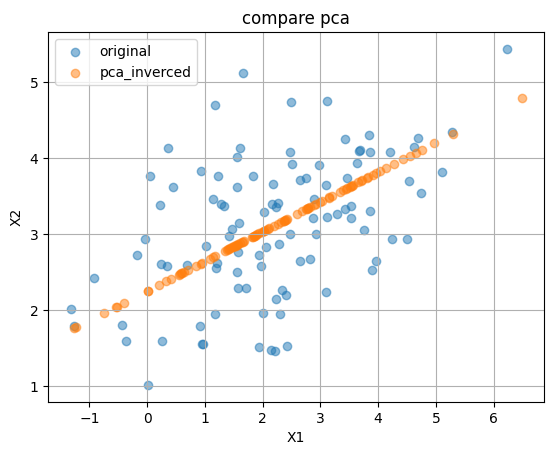

In [222]:
plt.scatter(data[:,0], data[:,1], alpha = 0.5)
plt.scatter(data_inv[:,0], data_inv[:,1], alpha = 0.5)
plt.title('compare pca')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['original', 'pca_inverced'])
plt.grid(True)
plt.show()

1. 주성분 분석(PCA)의 작동 원리

PCA는 데이터의 분산을 최대한 설명하는 방향(주성분)을 찾습니다.
첫 번째 주성분은 데이터의 분산이 가장 큰 방향을 나타내며, 두 번째 주성분은 그 다음으로 큰 분산을 설명합니다.

2. 차원 축소

n_components=1로 설정하면, 데이터가 첫 번째 주성분 방향으로만 축소됩니다.
이 과정에서 데이터는 본래의 다차원 공간에서 하나의 축(첫 번째 주성분)으로 투영됩니다.

3. 복원

차원 축소된 데이터를 복원할 때, PCA는 데이터를 다시 원래의 공간으로 변환합니다.
그러나 이 변환은 주성분 방향으로만 이루어지므로, 복원된 데이터는 첫 번째 주성분에 따라 정렬된 직선 상에 놓이게 됩니다.
이 직선은 원래 데이터가 투영된 주성분 방향에 대응하는 선입니다.

####요약

데이터가 직선으로 복원되는 이유는 PCA의 차원 축소 과정에서 모든 데이터가 첫 번째 주성분(하나의 축) 상으로 투영되었기 때문입니다.

복원된 데이터는 이 축을 따라 다시 원래의 공간으로 확장되지만, 투영된 축(주성분) 이외의 정보는 손실되므로 직선 형태로 나타납니다.

따라서 복원된 데이터가 직선으로 나타나는 것은 차원 축소 과정에서 발생하는 정보 손실과 관련된 자연스러운 결과입니다.

### 모델 평가

  - 교차검증 모델

In [223]:
from sklearn import datasets, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [224]:
# 숫자 데이터 로드
digits = datasets.load_digits()

X = digits.data
y = digits.target
X , y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [225]:
scaler = StandardScaler()
logistic = LogisticRegression()
# 파이프라인 생성 : 데이터를 표준화하고 그 데이터로 로지스틱회귀에 적용
pipeline = make_pipeline(scaler, logistic)
# k-폴드 교차 검증 생성
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# 교차 검증 수행
cv_result = cross_val_score(pipeline, # 파이프라인
                            X, # 원본 학습용 데이터
                            y, # 정답
                            cv=kfold, # 교차검증 기법
                            scoring='accuracy', # 평가 지표
                            n_jobs=-1 # 모든 CPU 코어 사용
                            )

In [226]:
cv_result.mean()

0.9638223460229032

In [227]:
X.shape , y.shape

((1797, 64), (1797,))

In [228]:
X_scaled = scaler.fit_transform(X)
logistic = LogisticRegression()
logistic.fit(X_scaled, y)

LogisticRegression()

In [229]:
scaler = StandardScaler()
logistic = LogisticRegression()
# 파이프라인 생성 : 데이터를 표준화하고 그 데이터로 로지스틱회귀에 적용
pipeline = make_pipeline(scaler, logistic)
pipeline.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [230]:
pipeline.predict(X)

array([0, 1, 2, ..., 8, 9, 8])

In [231]:
logistic.predict(X_scaled)

array([0, 1, 2, ..., 8, 9, 8])

### 기본 회귀 모델 만들기

데이터에 대해서 적용가능한 모델들을 각각 교차 검증 해서 가장 성능 높은 모델을 선택

In [232]:
# 사용가능한 모델을 정의 - 분류형태의 머신러닝
from sklearn.neighbors import KNeighborsClassifier # 최근접 이웃 분류
from sklearn.linear_model import LogisticRegression # 로지스틱 함수를 이용한 분류
from sklearn.svm import SVC # 분류
from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.ensemble import RandomForestClassifier # 앙상블
from sklearn.naive_bayes import GaussianNB # 가우시안 알고리즘을 이용한 분류
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.model_selection import KFold, cross_val_score # 교차 검증
from sklearn.pipeline import make_pipeline # 자동화

In [233]:
# dictionary를 이용해서 다양한 모델을 정의
models = {
    'knn': KNeighborsClassifier(),
    'logistic': LogisticRegression(),
    'svm': SVC(),
    'tree': DecisionTreeClassifier(),
    'forest': RandomForestClassifier(),
    'naive': GaussianNB()
}

In [234]:
models.items()

dict_items([('knn', KNeighborsClassifier()), ('logistic', LogisticRegression()), ('svm', SVC()), ('tree', DecisionTreeClassifier()), ('forest', RandomForestClassifier()), ('naive', GaussianNB())])

In [235]:
# 파이프라인을 통해 전처리 및 모델 학습 / 평가
pipelines = {}
for name, model in models.items():
    pipelines[name] = make_pipeline(StandardScaler(), model)

In [236]:
pipelines

{'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 'logistic': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())]),
 'tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 'forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'naive': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())])}

In [237]:
# 각각의 파이프라인에 대한 교차 검증 수행
results = {}
for name, pipeline in pipelines.items():
  kfold = KFold(n_splits=5, shuffle=True, random_state=42)
  cv_result = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)
  results[name] = cv_result.mean()
  print(f'{name} : {cv_result.mean()}')

knn : 0.9749551222531723
logistic : 0.9638223460229032
svm : 0.9794103992571961
tree : 0.8608696997833489
forest : 0.9732838130609718
naive : 0.7829789538842464


In [238]:
results

{'knn': 0.9749551222531723,
 'logistic': 0.9638223460229032,
 'svm': 0.9794103992571961,
 'tree': 0.8608696997833489,
 'forest': 0.9732838130609718,
 'naive': 0.7829789538842464}

In [239]:
sorted(results.items(), key = lambda x: x[1].mean(), reverse=False)

[('naive', 0.7829789538842464),
 ('tree', 0.8608696997833489),
 ('logistic', 0.9638223460229032),
 ('forest', 0.9732838130609718),
 ('knn', 0.9749551222531723),
 ('svm', 0.9794103992571961)]

머신러닝 회귀모델의 비교해서 가장 성능이 우수한 모델 선택하기

In [240]:
# 회귀모델의 모든 종류를 평가해서 가장 성능이 우수한 모델 찾기
# 선형 회귀 모델 로드하기
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

In [241]:
pip install ucimlrepo

In [242]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

# metadata
print(air_quality.metadata)

# variable information
print(air_quality.variables)


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 'S. D. Vito, E. Massera, M. P

In [243]:
X.shape

(9357, 15)

In [244]:
X

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [245]:
data = X

In [246]:
# Check the column names in your DataFrame
print(data.columns)

# Assuming 'C6H6' is a valid column name (case-sensitive):
X = data.drop('C6H6(GT)', axis=1)
y = data['C6H6(GT)']

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [247]:
X , y

(           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  \
 0     3/10/2004  18:00:00     2.6         1360       150           1046   
 1     3/10/2004  19:00:00     2.0         1292       112            955   
 2     3/10/2004  20:00:00     2.2         1402        88            939   
 3     3/10/2004  21:00:00     2.2         1376        80            948   
 4     3/10/2004  22:00:00     1.6         1272        51            836   
 ...         ...       ...     ...          ...       ...            ...   
 9352   4/4/2005  10:00:00     3.1         1314      -200           1101   
 9353   4/4/2005  11:00:00     2.4         1163      -200           1027   
 9354   4/4/2005  12:00:00     2.4         1142      -200           1063   
 9355   4/4/2005  13:00:00     2.1         1003      -200            961   
 9356   4/4/2005  14:00:00     2.2         1071      -200           1047   
 
       NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
 0    

In [248]:
X

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,961,235,702,156,1041,770,28.3,13.5,0.5139


In [249]:
X['DateTime'] = pd.to_datetime(X['Date'] + ' ' + X['Time'])

In [250]:
X.drop(['Date', 'Time'], axis=1, inplace=True)
X.set_index('DateTime', inplace=True)
X

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314,-200,1101,472,539,190,1374,1729,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163,-200,1027,353,604,179,1264,1269,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142,-200,1063,293,603,175,1241,1092,26.9,18.3,0.6406


In [251]:
models = {
    'linear': LinearRegression(),
    'svm': SVR(),
    'tree': DecisionTreeRegressor(),
    'forest': RandomForestRegressor(),
    'knn': KNeighborsRegressor()
}


In [252]:
# 각 모델별 파이프라인 리스트 만들고
pipelines = {}
for name, model in models.items():
    pipelines[name] = make_pipeline(StandardScaler(), model)

# 각 파이프라인별 교차 검증을 실행해서 결과를 리스트로 저장
results = {}
for name, pipeline in pipelines.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_result = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    results[name] = cv_result.mean()
    print(f'{name} : {cv_result.mean()}')

linear : -1.3034511256483516
svm : -108.97149948408017
tree : -0.04133889162977886
forest : -0.025955548052026756
knn : -0.8428112839927457


In [253]:
results

{'linear': -1.3034511256483516,
 'svm': -108.97149948408017,
 'tree': -0.04133889162977886,
 'forest': -0.025955548052026756,
 'knn': -0.8428112839927457}

In [254]:
sorted(results.items(), key = lambda x: x[1].mean(), reverse=True)

[('forest', -0.025955548052026756),
 ('tree', -0.04133889162977886),
 ('knn', -0.8428112839927457),
 ('linear', -1.3034511256483516),
 ('svm', -108.97149948408017)]

In [255]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [256]:
X.shape

(17379, 13)

In [257]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [258]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [259]:
X.set_index('dteday', inplace=True)

In [260]:
y.shape

(17379, 1)

In [261]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cnt     17379 non-null  int64
dtypes: int64(1)
memory usage: 135.9 KB


In [262]:
models = {
    'linear': LinearRegression(),
    'svm': SVR(),
    'tree': DecisionTreeRegressor(),
    'forest': RandomForestRegressor(),
    'knn': KNeighborsRegressor()
}


In [263]:
# 각 모델별 파이프라인 리스트 만들고
pipelines = {}
for name, model in models.items():
    pipelines[name] = make_pipeline(StandardScaler(), model)

# 각 파이프라인별 교차 검증을 실행해서 결과를 리스트로 저장
results = {}
for name, pipeline in pipelines.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_result = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    results[name] = cv_result.mean()
    print(f'{name} : {cv_result.mean()}')


linear : -20135.765971610588
svm : -20023.459677379302
tree : -3521.897562293548
forest : -1803.5967324972742
knn : -11624.105996049377


In [264]:
results

{'linear': -20135.765971610588,
 'svm': -20023.459677379302,
 'tree': -3521.897562293548,
 'forest': -1803.5967324972742,
 'knn': -11624.105996049377}

In [265]:
sorted(results.items(), key = lambda x: x[1].mean(), reverse=True)

[('forest', -1803.5967324972742),
 ('tree', -3521.897562293548),
 ('knn', -11624.105996049377),
 ('svm', -20023.459677379302),
 ('linear', -20135.765971610588)]